# Описательные статистики

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

## Данные

In [2]:
df = pd.read_csv("youtube_data_short.csv", sep = "\t")

In [3]:
df.head()

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
0,"""#2Маши ""Свободные линии""",34.0,43.0,1402.0,popsa,2маши,214301.0,24.0,0.0,1141
1,"""ALARM"" СЕРГЕЙ ЛАЗАРЕВ ( SERGEY LAZAREV )",NaN,690.0,10532.0,popsa,лазарев,2221419.0,NaN,NaN,3217
2,"""EARTH SONG"" SERGEY LAZAREV. DEDICATED TO MIC...",26.0,10.0,269.0,popsa,лазарев,40327.0,23.0,0.0,3546
3,"""Earth song"" премия МУЗ-тВ 2010 (LIVE)",12.0,7.0,163.0,popsa,лазарев,11907.0,11.0,0.0,3189
4,"""FAKE"" СЕРГЕЙ ЛАЗАРЕВ (SERGEY)",46.0,19.0,597.0,popsa,лазарев,91483.0,33.0,1.0,3361


In [4]:
df.dtypes

title                    object
commentCount            float64
dislikeCount            float64
likeCount               float64
music_style              object
performer                object
viewCount               float64
commentators_uniq       float64
comments_obscene_cnt    float64
video_age                 int64
dtype: object

 - title - Название видео
 - commentCount - Число комментариев
 - dislikeCount - Число дизлайков
 - likeCount - Число лайков
 - music_style - Музыкальный стиль
 - performer - Исполнитель
 - viewCount - Число просмотров
 - commentators_uniq - Число уникальных комментариев
 - comments-obscene_cnt - Число комментариев
 - video_age - Возраст видео в днях
 

## Описательные статистики

In [5]:
df.likeCount

0         1402.0
1        10532.0
2          269.0
3          163.0
4          597.0
          ...   
19119       11.0
19120     1837.0
19121    30603.0
19122      260.0
19123       22.0
Name: likeCount, Length: 19124, dtype: float64

In [8]:
np.mean(df.likeCount.values, ) # Есть пропуски

nan

### Максимальное и минимальное значение

In [9]:
df.likeCount.max()

1686810.0

In [10]:
df["likeCount"].min()

0.0

In [12]:
# Видео с максимальным числом лайков
mx = df.likeCount.max()
df[df.likeCount == mx]

,title,commentCount,dislikeCount,likeCount,music_style,performer,viewCount,commentators_uniq,comments_obscene_cnt,video_age
18649,Элджей & Feduk - Розовое вино,191702.0,151772.0,1686810.0,rap,feduk,208753182.0,3702.0,183.0,485


### Меры центральной тенденции

In [14]:
df.likeCount.mean() # Среднее

5735.014482758621

In [16]:
df.likeCount.median() # Медиана

100.0

<AxesSubplot:>

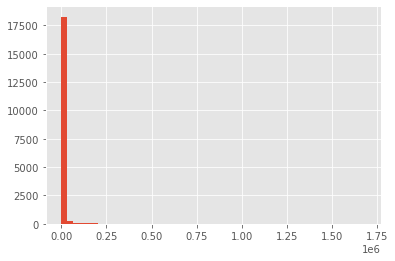

In [84]:
df.likeCount.hist(bins=50)

Чтобы лучше разглядеть хвост, можно использовать логарифмическую шкалу

<AxesSubplot:>

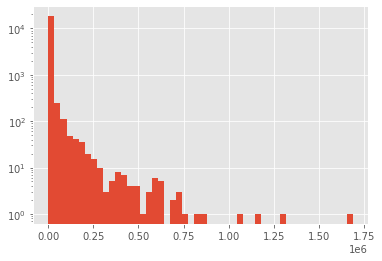

In [20]:
df.likeCount.hist(bins=50, log=True)

!!!Среднее значение чувствительно к выбросам, а медиана нет!!!

### Меры разброса

In [21]:
df.likeCount.var(ddof=0) # Дисперсия, variance

1513365309.7446747

In [22]:
df.likeCount.var(ddof=1) # Несмещенный вариант

1513445598.635849

In [23]:
df.likeCount.std(ddof=0) # Стандартное отклонение

38901.99621799214

In [24]:
df.likeCount.std(ddof=1) # Несмещенный вариант

38903.02814223912

### Квантили

In [25]:
df.likeCount.quantile(0.99)

128146.6499999979

Выходит, что у 99% видео из выборки меньше 128146 лайков, а у 1% видео - больше

In [27]:
q = df.likeCount.quantile(0.99)

In [33]:
x = df[df.likeCount > q].music_style # Оставить только music_style
x

186      popsa
205      popsa
288        rap
305      popsa
306      popsa
         ...  
18672      rap
18680      rap
18692      rap
18693      rap
18698      rap
Name: music_style, Length: 189, dtype: object

In [34]:
x.value_counts() # Тот самый 1% видео и распределение по жанрам

rap        108
popsa       36
rock        19
classic     18
indi         7
estrada      1
Name: music_style, dtype: int64

### Метод describe

Считает сразу всё

In [35]:
df.describe()

,commentCount,dislikeCount,likeCount,viewCount,commentators_uniq,comments_obscene_cnt,video_age
count,18914.000000,18850.000000,1.885000e+04,1.912300e+04,12314.000000,12314.000000,19124.000000
mean,394.026065,745.344297,5.735014e+03,8.436486e+05,131.594608,8.952899,1389.772642
std,4200.463284,9339.777800,3.890303e+04,6.382348e+06,333.584804,37.887947,1054.261698
min,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,1.000000,1.800000e+01,1.915000e+03,4.000000,0.000000,378.000000
50%,5.000000,5.000000,1.000000e+02,1.135300e+04,13.000000,0.000000,1213.000000
75%,35.000000,38.000000,6.367500e+02,8.180900e+04,61.000000,2.000000,2218.000000
max,303077.000000,640698.000000,1.686810e+06,2.720477e+08,3702.000000,693.000000,4574.000000


In [36]:
df.describe(include="object")

,title,music_style,performer
count,19124,19124,19124
unique,18029,7,111
top,Алексей Кортнев и Валдис Пельш в проекте «Две ...,rock,николаев
freq,11,5888,566


## Группировка

Метод groupby

In [40]:
df.groupby("music_style").likeCount.mean()
# Группировка по стилю музыки и печать среднего значения

music_style
classic    28663.333333
estrada      938.686662
indi        2471.842299
popsa       7492.273792
rap        26802.456253
rock        2132.887061
shanson      440.390564
Name: likeCount, dtype: float64

Можно делать groupby по нескольким колонкам, получать результаты по нескольким колонкам и даже применять несколько функций за раз

In [43]:
df.groupby("music_style")[["likeCount","dislikeCount"]].agg(["mean","count", "median"])

likeCount               dislikeCount             
                     mean count  median         mean count median
music_style                                                      
classic      28663.333333   297   536.0  1236.228956   297   18.0
estrada        938.686662  3951    47.0   173.565933  3951    3.0
indi          2471.842299  1357    37.0   220.419307  1357    2.0
popsa         7492.273792  3331   323.0   790.161513  3331   15.0
rap          26802.456253  2023  2656.0  4099.575383  2023  154.0
rock          2132.887061  5835    80.0   287.698201  5835    3.0
shanson        440.390564  2056    17.0    45.488327  2056    1.0

In [44]:
df["is_comment"] = 1*(df["commentators_uniq"] > 0)
df["is_comment"].value_counts()

1    12314
0     6810
Name: is_comment, dtype: int64

In [45]:
df.groupby(["music_style","is_comment"])[["dislikeCount","likeCount"]].agg(["mean","max","min","count"])

dislikeCount                          likeCount  \
                               mean       max  min count          mean   
music_style is_comment                                                   
classic     0            206.125000    6127.0  0.0    32   8253.218750   
            1           1360.618868   52892.0  0.0   265  31127.950943   
estrada     0              9.333543    2584.0  0.0  1589     98.007552   
            1            284.050804  348770.0  0.0  2362   1504.240898   
indi        0             69.887344   14244.0  0.0   719   1231.396384   
            1            390.062696   32478.0  0.0   638   3869.774295   
popsa       0            218.583554   82016.0  0.0   754   1544.502653   
            1            957.398525  177367.0  0.0  2577   9232.521925   
rap         0           3435.579832  194450.0  0.0   238  22701.928571   
            1           4188.108123  640698.0  0.0  1785  27349.193277   
rock        0             16.923953    2514.0  0.0  2196    186.520492   
            1            451.100302  133644.0  0.0  3639   3307.446276   
shanson     0              4.716667    1712.0  0.0  1200     78.508333   
            1            102.644860   12906.0  0.0   856    947.702103   

                                               
                              max   min count  
music_style is_comment                         
classic     0            250835.0   1.0    32  
            1            849676.0   9.0   265  
estrada     0             17511.0   0.0  1589  
            1            377957.0   0.0  2362  
indi        0            389416.0   0.0   719  
            1            218384.0   0.0   638  
popsa       0            222212.0   0.0   754  
            1            698902.0   0.0  2577  
rap         0           1297718.0   6.0   238  
            1           1686810.0  11.0  1785  
rock        0             40720.0   0.0  2196  
            1            827118.0   0.0  3639  
shanson     0             29401.0   0.0  1200  
            1             85023.0   0.0   856

## Apply

Можно применять каждому объекту ячейки одну и ту же функцию. Это можно сделать методом apply. Посчитаем число букв в названии каждого клипа из таблицы:

In [49]:
df.title.apply(len) # Для каждого title применяется функция len

0        25
1        41
2        75
3        38
4        30
         ..
19119    35
19120    88
19121    15
19122    65
19123    63
Name: title, Length: 19124, dtype: int64

In [50]:
df.title.apply(len).mean()

35.293871574984315

Со своими функциями тоже работает

In [51]:
def my_func(name):
    return name[0]

df.title.apply(my_func)

0        "
1        "
2        "
3        "
4        "
        ..
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, Length: 19124, dtype: object

Работает и с лямбда-функциями

In [52]:
df.title.apply(lambda name: name[0])

0        "
1        "
2        "
3        "
4        "
        ..
19119    ♫
19120    ❤
19121    モ
19122    舞
19123    🎄
Name: title, Length: 19124, dtype: object

## Гистограммы

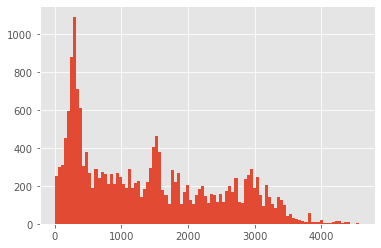

In [56]:
plt.hist(df["video_age"], bins=100);

Можно сгладить распределения

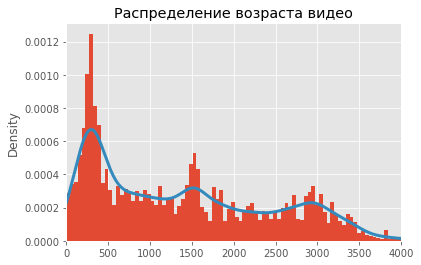

In [87]:
df["video_age"].hist(bins=100, density=True)
# kde - ядерная оценка плотности
df["video_age"].plot(kind="kde", linewidth=3)

plt.xlim(0,4000)
plt.title("Распределение возраста видео");

Можно построить несколько гистограмм

<Figure size 1440x504 with 0 Axes>

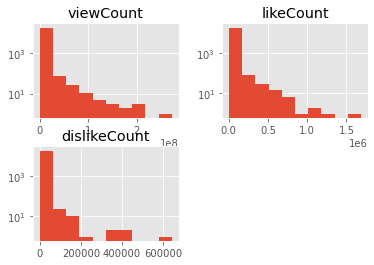

In [78]:
plt.figure(figsize=(20,7))
columns = ["viewCount","likeCount","dislikeCount"]
df[columns].hist(log=True);

Можно построить гистограммы для логарифмов показателей. Обычно логарифмирование используют для того, чтобы сгладить выбросы и сделать данные более гладкими. Более того, на осноме логарифма можно придумать преобразование которое нормализует данные.

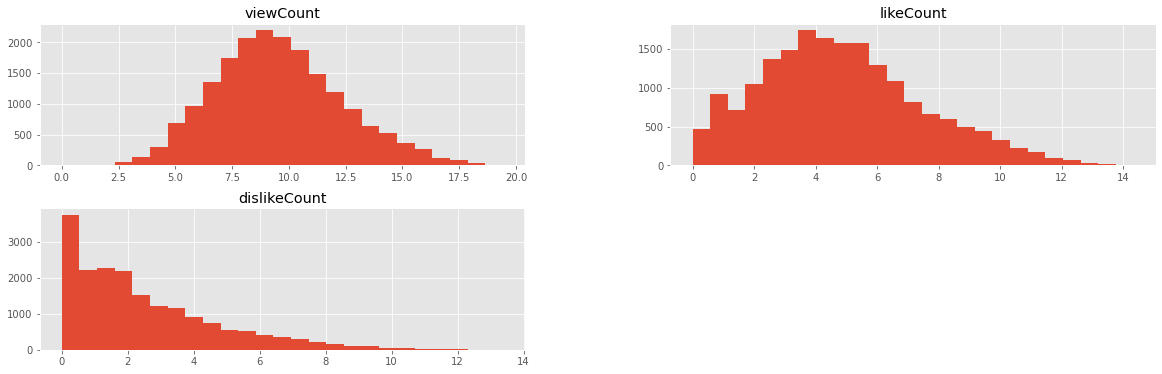

In [70]:
df[columns].apply(lambda x: np.log(x+1)).hist(bins = 25, figsize=(20,6));

## Boxplot

In [75]:
df_log = df[columns].apply(lambda x: np.log(x+1))
df_log["music_style"] = df["music_style"] # Добавили колонку music_style
df_log.head()

,viewCount,likeCount,dislikeCount,music_style
0,12.275142,7.246368,3.784190,popsa
1,14.613657,9.262268,6.538140,popsa
2,10.604801,5.598422,2.397895,popsa
3,9.384966,5.099866,2.079442,popsa
4,11.423919,6.393591,2.995732,popsa


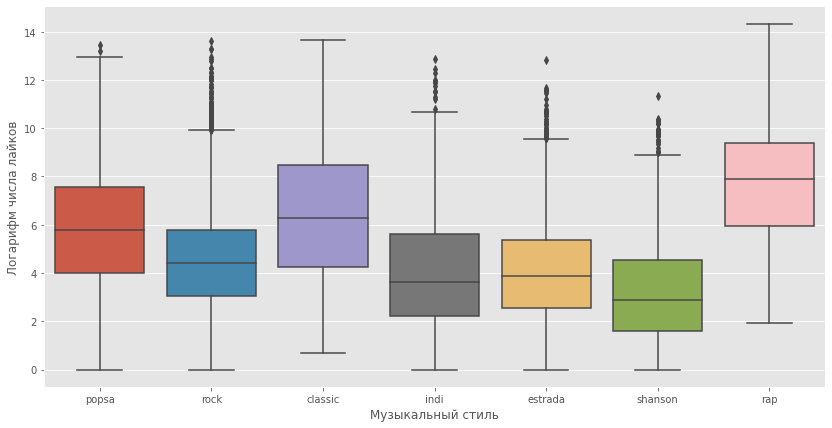

In [76]:
plt.figure(figsize = (14,7))

sns.boxplot(x="music_style", y="likeCount", data=df_log)

plt.xlabel("Музыкальный стиль")
plt.ylabel("Логарифм числа лайков");

Можно построить похожую картину под название виалончель. Она отражает то же самое что и boxplot, но выглядит красиво.

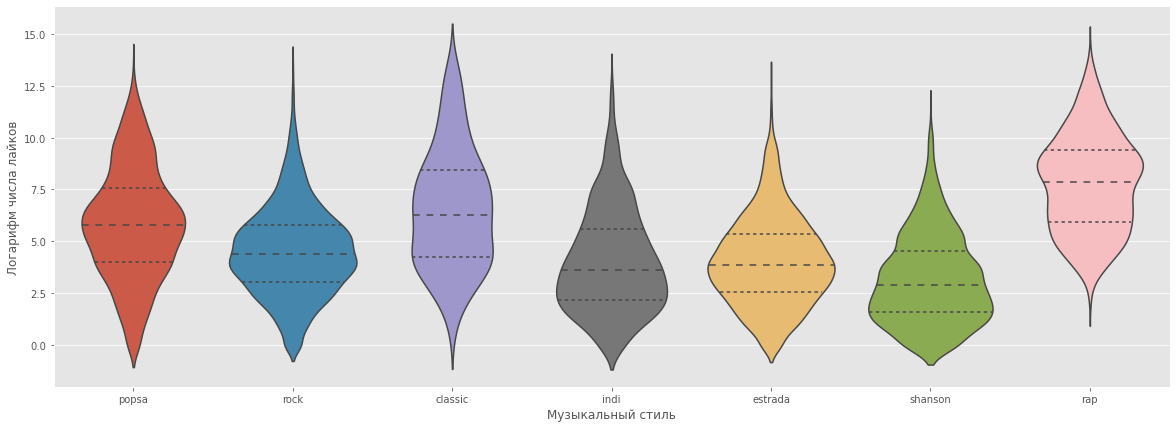

In [77]:
plt.figure(figsize=(20,7))

sns.violinplot(x="music_style", y="likeCount", data=df_log,
               inner="quartile")

plt.xlabel("Музыкальный стиль")
plt.ylabel("Логарифм числа лайков");